<a href="https://colab.research.google.com/github/wesleynandes/analise-case-airbnb-amsterdam/blob/main/Analise_airbnb_cidades_europeias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Projeto Case Airbnb**
Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD2

**Aluno: Wesley Luiz**

Professor: Franciane Rodrigues

#**Pergunta de negócio**: Faça uma análise exploratória de dados com a base de dados do Airbnb e indique possíveis oportunidades e/ou ameaças para o empreendimento.


---




>### **Nível - Tratamento e Análise**

* Verificar todos os passos da estratégia de análise geral de análise de dados;
* Executar o que for necessário;
* Todos os passos devem ser comentados;
* Realizar no mínimo 3 análises apenas numéricas;
* Realizar plotagens para no mínimo 3 análises;
* Chegar a uma conclusão de sua análise;

>### **Nivel - Infra**

* O Dataset deve ser salvo em ambiente local  (Google Drive) - (bruto e tratado)
* O Dataset deve ser salvo em ambiente cloud (Cloud Storage) - (bruto e tratado)
* O Arquivo original e tratado deve ser salvo em MongoDB Atlas em coleções diferentes

# Base de Dados
Este conjunto de dados fornece uma visão abrangente dos preços do Airbnb em algumas das cidades europeias mais populares. Cada listagem é avaliada quanto a várias características, como tipos de quartos, classificações de limpeza e satisfação, número de quartos, distância do centro da cidade e muito mais, para obter uma compreensão detalhada dos preços do Airbnb tanto durante a semana quanto nos fins de semana.

Fonte: https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities

## **Dicionário de dados**

* **realSum:** O preço total do anúncio do Airbnb.
* **room_type:** O tipo de quarto oferecido (por exemplo, privado, compartilhado, etc.).
* **room_shared:** Se o quarto é compartilhado ou não.  
* **room_private**: Se o quarto é privado ou não.
* **person_capacity**: O número máximo de pessoas que podem ficar no quarto.
* **host_is_superhost**: Se o host é um superhost ou não. (Super Anfitrião na tradução literal – é um título de reconhecimento que o site do Airbnb dá a seus melhores anfitriões.)
* **multi**: anfitriões que possuem 2 a 4 listagens.  
* **biz**:  anfitriões com mais de 4 listagens.
* **cleanliness_rating**: classificação de limpeza da listagem. 	  
* **guest_satisfaction_overall**: A classificação geral de satisfação do hóspede.
* **bedrooms**: O número de quartos. (0 para estudios)
* **dist**: A distância do centro da cidade em km.  
* **metro_dist**: A distância da estação de metrô mais próxima em km.
* **attr_index**: indice de atrações locais proximas
* **attr_index_norm**: indice de atrações locais normalizadas (0-100)
* **rest_index**: indice de restaurantes locais proximos
* **rest_index_norm**: indice de restaurantes locais proximos normalizados (0-100)
* **lng**: Longitude
* **lat**: Latitude

> fonte:
*   https://anfitrioesdealuguel.com.br/blog/superhost/
*   https://www.airbnb.com.br/help/article/828
*   https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities
*   https://zenodo.org/record/4446043#.Y9Y9ENJBwUE
*   https://www.sciencedirect.com/science/article/pii/S0261517721000388

## **Os 5W's**

* What (o que será feito?)
Análise dos preços do Airbnb em cidades europeias populares

* Why (por que será feito?)
Identificar oportunidades e ameaças para os anunciantes do Airbnb, e explorar as relações entre os atributos para melhorar a competitividade.

* Where (onde será feito?)
A análise pode ser aplicada em diferentes cidades europeias onde o Airbnb está presente e onde há disponibilidade de dados sobre os preços e características das listagens.

* When (quando será feito?)
A análise pode ser realizada periodicamente para acompanhar as tendências dos preços e das características das listagens do Airbnb, e também pode ser conduzida antes de tomar decisões estratégicas relacionadas à precificação e diferenciação de anúncios.

* Who (por quem será feito?)
Anunciantes e gestores de propriedades no Airbnb, profissionais do setor de hospedagem, analistas de mercado e pesquisadores interessados nos preços e características das listagens do Airbnb.

# Instalações e Importações

In [ ]:
!pip install gcsfs # instalaçao de biblioteca para interagir com google cloud

In [ ]:
!pip install pandera # instalaçao de biblioteca para validar dados com pandera

In [ ]:
# Importando Bibliotecas pré instaladas
import pandas as pd
import numpy as np
import os
import pandera as pa
from  google.cloud import storage
from google.colab import drive

In [ ]:
# Ignorando alguns alertas desnecessários
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Configuração da quantidade de colunas para aparecer em um DataFrame
pd.set_option('display.max_columns',100)

# **Extração**

In [ ]:
# Conexão com a conta do Google Cloud

serviceAccount = '/content/atividade1turmaad2-wesleyluiz-b681309dc471.json' # chave da conta de serviço
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount


In [ ]:
# Conexão com a bucket do Google Cloud

client = storage.Client()
bucket = client.get_bucket('repositorio-temporario-datasets') # nome do bucket
bucket.blob('airbnb_bruto.csv') # nome do arquivo
path = 'gs://repositorio-temporario-datasets/projeto-airbnb/bruto/airbnb_bruto.csv' # gsutil


In [ ]:
# Conexão com o Google Drive
# drive.mount('/content/drive')

In [ ]:
# Conexão com a pasta do Google Drive
# path = '/content/drive/MyDrive/Aulas-Soulcode-Python/airbnb_bruto.csv'

In [ ]:
# Leitura e configuração dos arquivos extraidos
df = pd.read_csv(path,
                 sep=',',
                 encoding='ISO-8859-1',
                 dayfirst= True)

# **Pré análise**

In [ ]:
# Visualização geral
df

In [ ]:
# Visualização de forma aleatoria
df.sample(3)

In [ ]:
# Tamanho total de (linhas , colunas)
df.shape

In [ ]:
# Todos os tipos de dados presentes
df.dtypes

In [ ]:
# Contagem de observações para cada coluna
df.count()

In [ ]:
# Informações detalhadas
df.info()

In [ ]:
# Backup local
dfbackup1 = df.copy()

# **Transformação**

## **Verificações**

In [ ]:
# Verificar se há valores nulos/ausentes
df.isnull().sum()

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64

In [ ]:
# Verificar se há valores duplicados
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1098    False
1099    False
1100    False
1101    False
1102    False
Length: 1103, dtype: bool

In [ ]:
# Verificando os valores presentes na coluna 'bedrooms'
print(f'Valores presentes na coluna bedrooms: {pd.unique(df.bedrooms)}')

Valores presentes na coluna bedrooms: [1 2 3 0 5 4]


In [ ]:
# Visualizando se coluna 'satisfacao_hospede' ultrapassa o valor 100
filtro_max_satisfaction = df.loc[:,'guest_satisfaction_overall']
filtro_max_satisfaction.max()

100.0

In [ ]:
# Verifica a inconsistencia se há algum quarto que consta como compartilhado e privado ao mesmo tempo
ft_room_shared = df.room_shared == True
ft_room_private = df.room_private == True
# Localizando as linhas que correspondem ao filtro feito antes
df.loc[ft_room_shared & ft_room_private]
'''
Room shared e room private saem da lista, por redundancia, roomtype
previamente traz os mesmo valores em uma unica coluna.
'''

'\nRoom shared e room private saem da lista, por redundancia, roomtype\npreviamente traz os mesmo valores em uma unica coluna.\n'

In [ ]:
# Verificação ordenada das observações de latitude e longitude prevendo possiveis inconsistencias
print(sorted(pd.unique(df.lng)))
print(sorted(pd.unique(df.lat)))

In [ ]:
# Verificando inconsistencias
pd.unique(df.attr_index)

array([ 78.69037927, 631.17637825,  75.27587691, ..., 440.47651523,
       257.94810507, 533.9626528 ])

In [ ]:
# Verificando inconsistencias
pd.unique(df.attr_index_norm)

array([ 4.16670787, 33.42120862,  3.9859077 , ..., 23.32352416,
       13.65852356, 28.27367726])

In [ ]:
# Verificando inconsistencias
pd.unique(df.rest_index)

array([ 98.25389587, 837.28075674,  95.38695493, ..., 625.94756243,
       336.58923657, 807.49230724])

In [ ]:
# Verificando inconsistencias
pd.unique(df.rest_index_norm)

array([ 6.84647282, 58.34292774,  6.64670025, ..., 43.61692671,
       23.45402226, 56.26722573])

## **Tradução**

In [ ]:
# Renomeando/Traduzindo colunas
df.rename(columns={'realSum':'preco_total',
                   'room_type':'tipo_quarto',
                   'room_shared': 'quarto_compartilhado',
                   'room_private': 'quarto_privado',
                   'person_capacity':'capacidade_pessoas',
                   'host_is_superhost':'anfitriao_superhost',
                   'multi': 'detem_multiplas_listagens',
                   'biz':'detem_abundantes_listagens',
                   'cleanliness_rating':'avaliacao_limpeza',
                   'guest_satisfaction_overall':'satisfacao_hospede',
                   'bedrooms':'quantidade_quartos',
                   'dist':'distancia_centro',
                   'metro_dist':'metro_distancia',
                   'attr_index': 'atracao_local_index',
                   'attr_index_norm': 'atracao_local_normalizado',
                   'rest_index': 'restaurante_local_index',
                   'rest_index_norm': 'restaurante_local_normalizado',
                   'lng': 'longitude',
                   'lat': 'latitude',}, inplace=True)

In [ ]:
# Examinando se as colunas foram alteradas
df.dtypes

Unnamed: 0                         int64
preco_total                      float64
tipo_quarto                       object
quarto_compartilhado                bool
quarto_privado                      bool
capacidade_pessoas               float64
anfitriao_superhost                 bool
detem_multiplas_listagens          int64
detem_abundantes_listagens         int64
avaliacao_limpeza                float64
satisfacao_hospede               float64
quantidade_quartos                 int64
distancia_centro                 float64
metro_distancia                  float64
atracao_local_index              float64
atracao_local_normalizado        float64
restaurante_local_index          float64
restaurante_local_normalizado    float64
longitude                        float64
latitude                         float64
dtype: object

In [ ]:
# Renomeando/Traduzindo registros

traducao_tipo_quarto = {
    'Private room': 'QUARTO PRIVADO',
    'Entire home/apt': 'APT/CASA INTEIRA',
    'Shared room': 'QUARTO COMPARTILHADO'
}
df.tipo_quarto.replace(traducao_tipo_quarto,inplace=True)

In [ ]:
# Examinando se os registros foram alterados
pd.unique(df.tipo_quarto)

array(['QUARTO PRIVADO', 'APT/CASA INTEIRA', 'QUARTO COMPARTILHADO'],
      dtype=object)

## **Tipagem**

In [ ]:
# Realizando a tipagem das variaveis
df.capacidade_pessoas = df.capacidade_pessoas.astype(int)

In [ ]:
# Realizando a tipagem das variaveis
df.satisfacao_hospede = df.satisfacao_hospede.astype(int)

In [ ]:
dfbackup2 = df.copy()

In [ ]:
df.dtypes

Unnamed: 0                         int64
preco_total                      float64
tipo_quarto                       object
quarto_compartilhado                bool
quarto_privado                      bool
capacidade_pessoas                 int64
anfitriao_superhost                 bool
detem_multiplas_listagens          int64
detem_abundantes_listagens         int64
avaliacao_limpeza                float64
satisfacao_hospede                 int64
quantidade_quartos                 int64
distancia_centro                 float64
metro_distancia                  float64
atracao_local_index              float64
atracao_local_normalizado        float64
restaurante_local_index          float64
restaurante_local_normalizado    float64
longitude                        float64
latitude                         float64
dtype: object

## **Limpeza**

In [ ]:
# Descartando colunas
df.drop(['Unnamed: 0', # por que bla bla bla
         'quarto_compartilhado', #
         'quarto_privado', #
         'detem_multiplas_listagens',
         'detem_abundantes_listagens',
         'atracao_local_index',
         'restaurante_local_index',], axis=1, inplace=True)

# **Qualidade e integridade dos dados**

## **Colunas Persistidas**

* preco_total
* tipo_quarto
* capacidade_pessoas
* anfitriao_superhost
* avaliacao_limpeza
* satisfacao_hospede
* quantidade_quartos
* distancia_centro
* metro_distancia
* atracao_local_normalizado
* restaurante_local_normalizado
* longitude
* latitude

## **Validar schema**

In [ ]:
# Definindo o esquema de validação e o examinando
schema = pa.DataFrameSchema({
    'preco_total': pa.Column(pa.Float),
    'tipo_quarto': pa.Column(pa.String),
    'capacidade_pessoas': pa.Column(pa.Int),
    'anfitriao_superhost': pa.Column(pa.Bool),
    'avaliacao_limpeza': pa.Column(pa.Float),
    'satisfacao_hospede': pa.Column(pa.Int),
    'quantidade_quartos': pa.Column(pa.Int),
    'distancia_centro': pa.Column(pa.Float),
    'metro_distancia': pa.Column(pa.Float),
    'atracao_local_normalizado': pa.Column(pa.Float),
    'restaurante_local_normalizado': pa.Column(pa.Float),
    'longitude': pa.Column(pa.Float),
    'latitude': pa.Column(pa.Float)
})

schema.validate(df)

,preco_total,tipo_quarto,capacidade_pessoas,anfitriao_superhost,avaliacao_limpeza,satisfacao_hospede,quantidade_quartos,distancia_centro,metro_distancia,atracao_local_normalizado,restaurante_local_normalizado,longitude,latitude
0,194.033698,QUARTO PRIVADO,2,False,10.0,93,1,5.022964,2.539380,4.166708,6.846473,4.90569,52.41772
1,344.245776,QUARTO PRIVADO,4,False,8.0,85,1,0.488389,0.239404,33.421209,58.342928,4.90005,52.37432
2,264.101422,QUARTO PRIVADO,2,False,9.0,87,1,5.748312,3.651621,3.985908,6.646700,4.97512,52.36103
3,433.529398,QUARTO PRIVADO,4,False,9.0,90,2,0.384862,0.439876,26.119108,60.973565,4.89417,52.37663
4,485.552926,QUARTO PRIVADO,2,True,10.0,98,1,0.544738,0.318693,29.272733,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.115342,APT/CASA INTEIRA,2,False,10.0,100,1,2.375833,1.436054,9.594573,15.699521,4.85869,52.37677
1099,233.637194,QUARTO PRIVADO,2,False,10.0,90,1,4.719736,0.322263,5.719989,9.391335,4.83611,52.34910
1100,317.062311,QUARTO PRIVADO,2,False,10.0,92,1,0.598355,0.751993,23.323524,43.616927,4.88897,52.37798
1101,1812.855904,APT/CASA INTEIRA,4,False,8.0,84,5,1.943020,0.388532,13.658524,23.454022,4.90688,52.35794


In [ ]:
# Backup para analise
df_tratado = df.copy()

# **Carregamento**

In [ ]:
# Upando para o Google Drive
# df.to_csv('/content/drive/MyDrive/Aulas-Soulcode-Python/airbnb_tratado.csv', index=False)

In [ ]:
# Upando para o Google Cloud

df.to_csv('gs://repositorio-temporario-datasets/projeto-airbnb/tratado/airbnb_tratado.csv', index=False)


# **Analise exploratória**

## **Filtros e agrupamentos**

Preço, atrações e restaurantes.

In [ ]:
# Filtrando e Comparando a minima, média e maxima de preços, atrações e restaurantes Locais
filtro_desc_attr_rest = df[['preco_total','atracao_local_normalizado', 'restaurante_local_normalizado']]
filtro_desc_attr_rest.agg(['min','mean', 'max']).round(2)

In [ ]:
# Filtro de preços para listagens na faixa de maior ou igual 75%(657)
filtro_maior_preco = (df.preco_total >= 657)
df_maior_preco = df.loc[filtro_maior_preco]
df_maior_preco

In [ ]:
# Filtro de preços para listagens na faixa de menor ou igual 25%(309)
filtro_menor_preco = (df.preco_total <= 309)
df_menor_preco = df.loc[filtro_menor_preco]
df_menor_preco

In [ ]:
# Filtro e agrupamento combinados, verificando quantos registros atendem a condição e qual seu preço médio
filtro_attr_rest = (df['atracao_local_normalizado'] < 50) & (df['restaurante_local_normalizado'] < 50)
df_attr_rest_filtro = df[filtro_attr_rest]
df_attr_rest_filtro.groupby(['atracao_local_normalizado', 'restaurante_local_normalizado'])['preco_total'].mean()

In [ ]:
# Estatisticas descritivas dos tres atributos
estatistica_preco_total = df.preco_total.describe()
estatistica_atracao_local = df.atracao_local_normalizado.describe()
estatistica_restaurante_local = df.restaurante_local_normalizado.describe()

print('Preço')
print(estatistica_preco_total)
print('-----------------------------')
print('Atração local')
print(estatistica_atracao_local)
print('-----------------------------')
print('Restaurante local')
print(estatistica_restaurante_local)

In [ ]:
# Cálculo e exibição da correlação entre preço e atrações/restaurantes locais
correlacao_atracoes = df['preco_total'].corr(df['atracao_local_normalizado'])
correlacao_restaurantes = df['preco_total'].corr(df['restaurante_local_normalizado'])
print(f'A correlação do preço atrelada a atrações locais {correlacao_atracoes:.2}')
print(f'A correlação do preço atrelada aos restaurantes locais {correlacao_restaurantes:.2}')

tipo quarto, avaliação limpeza e satisfação hospede

In [ ]:
# Correlação entre limpeza e satisfação, atrelado ao tipo de quarto
df.groupby('tipo_quarto')['avaliacao_limpeza'].corr(df['satisfacao_hospede'])

tipo_quarto
APT/CASA INTEIRA        0.689969
QUARTO COMPARTILHADO    0.888307
QUARTO PRIVADO          0.642493
Name: avaliacao_limpeza, dtype: float64

In [ ]:
# Quantidade de registros para cada tipo de quarto
df.groupby('tipo_quarto')['satisfacao_hospede'].size().sort_values(ascending=False)

tipo_quarto
QUARTO PRIVADO          559
APT/CASA INTEIRA        538
QUARTO COMPARTILHADO      6
Name: satisfacao_hospede, dtype: int64

In [ ]:
# Estatisticas descritivas de limpeza e satisfação
estatistica_avalicao_limpeza = df.avaliacao_limpeza.describe()
estatistica_satisfacao_hospede = df.satisfacao_hospede.describe()

print('Avaliação limpeza')
print(estatistica_avalicao_limpeza)
print('-----------------------------')
print('Satisfação hospede')
print(estatistica_satisfacao_hospede)

Avaliação limpeza
count    1103.000000
mean        9.461469
std         0.798201
min         4.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: avaliacao_limpeza, dtype: float64
-----------------------------
Satisfação hospede
count    1103.000000
mean       94.362647
std         6.089691
min        20.000000
25%        92.000000
50%        96.000000
75%        98.000000
max       100.000000
Name: satisfacao_hospede, dtype: float64


In [ ]:
# Filtro para menos de 50% de satisfação
ft_baixa_satisfacao = (df['satisfacao_hospede'] <= 92)
df.loc[ft_baixa_satisfacao]

,preco_total,tipo_quarto,capacidade_pessoas,anfitriao_superhost,avaliacao_limpeza,satisfacao_hospede,quantidade_quartos,distancia_centro,metro_distancia,atracao_local_normalizado,restaurante_local_normalizado,longitude,latitude
1,344.245776,QUARTO PRIVADO,4,False,8.0,85,1,0.488389,0.239404,33.421209,58.342928,4.90005,52.37432
2,264.101422,QUARTO PRIVADO,2,False,9.0,87,1,5.748312,3.651621,3.985908,6.646700,4.97512,52.36103
3,433.529398,QUARTO PRIVADO,4,False,9.0,90,2,0.384862,0.439876,26.119108,60.973565,4.89417,52.37663
9,276.521454,QUARTO PRIVADO,2,False,10.0,88,1,3.142361,0.924404,10.921226,16.604478,4.87600,52.34700
12,675.602840,APT/CASA INTEIRA,4,False,8.0,87,1,2.933046,0.628073,11.380334,18.787851,4.88934,52.34697
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,295.034331,QUARTO PRIVADO,2,False,8.0,86,1,4.880430,0.884337,5.683446,9.246667,4.84422,52.34116
1099,233.637194,QUARTO PRIVADO,2,False,10.0,90,1,4.719736,0.322263,5.719989,9.391335,4.83611,52.34910
1100,317.062311,QUARTO PRIVADO,2,False,10.0,92,1,0.598355,0.751993,23.323524,43.616927,4.88897,52.37798
1101,1812.855904,APT/CASA INTEIRA,4,False,8.0,84,5,1.943020,0.388532,13.658524,23.454022,4.90688,52.35794


In [ ]:
# Filtro para mais de 70% de satisfação
ft_alta_satisfacao = (df.satisfacao_hospede >= 98)
df.loc[ft_alta_satisfacao]

,preco_total,tipo_quarto,capacidade_pessoas,anfitriao_superhost,avaliacao_limpeza,satisfacao_hospede,quantidade_quartos,distancia_centro,metro_distancia,atracao_local_normalizado,restaurante_local_normalizado,longitude,latitude
4,485.552926,QUARTO PRIVADO,2,True,10.0,98,1,0.544738,0.318693,29.272733,56.811677,4.90051,52.37508
5,552.808567,QUARTO PRIVADO,3,False,8.0,100,2,2.131420,1.904668,9.255191,15.692376,4.87699,52.38966
7,2771.307384,APT/CASA INTEIRA,4,True,10.0,100,3,1.686807,1.458404,11.056528,18.975219,4.88467,52.38749
13,552.808567,APT/CASA INTEIRA,2,True,10.0,100,1,1.305494,1.342162,17.222519,27.239314,4.87417,52.37509
15,368.851499,QUARTO PRIVADO,2,True,10.0,98,1,1.031101,0.557885,19.058105,30.656388,4.90809,52.37455
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,768.167225,APT/CASA INTEIRA,4,False,10.0,98,3,3.609860,2.013256,5.636743,9.357386,4.90317,52.40509
1086,276.287114,APT/CASA INTEIRA,2,True,10.0,98,1,3.839556,0.754154,7.915598,12.995131,4.86004,52.34528
1092,792.772948,APT/CASA INTEIRA,4,True,10.0,98,2,1.360556,0.466626,19.083111,32.806557,4.90100,52.36200
1094,228.716050,QUARTO PRIVADO,3,True,10.0,98,1,7.628766,2.927773,3.271936,5.328303,4.79162,52.34422


Capacidade de pessoas

In [ ]:
# Verificando os valores minimo e maximo da capacidade de pessoas
df.capacidade_pessoas.agg(['min', 'max'])

min    2
max    6
Name: capacidade_pessoas, dtype: int64

In [ ]:
# Contagem de cada valor na coluna
df.capacidade_pessoas.value_counts().sort_index()

2    656
3     79
4    333
5     11
6     24
Name: capacidade_pessoas, dtype: int64

In [ ]:
# Estatisticas gerais
df.capacidade_pessoas.describe().round(2)

count    1103.00
mean        2.79
std         1.04
min         2.00
25%         2.00
50%         2.00
75%         4.00
max         6.00
Name: capacidade_pessoas, dtype: float64

In [ ]:
# Verificando o valor que mais se repete
df.capacidade_pessoas.mode()

0    2
Name: capacidade_pessoas, dtype: int64

In [ ]:
# Correlação entre capacidade de pessoas e o preço total das listagens
df['capacidade_pessoas'].corr(df['preco_total']).round(2)

0.53

In [ ]:
# Examinando a comparação da capacidade de pessoas com algumas estatisticas de preço total
estatisticas_capacidade = df.groupby('capacidade_pessoas').agg({'preco_total': ['mean', 'median', 'count']})
estatisticas_capacidade.round(2)

preco_total               
                          mean   median count
capacidade_pessoas                           
2                       393.69   350.10   656
3                       524.10   467.04    79
4                       760.11   685.91   333
5                      1087.13   823.47    11
6                      1517.55  1274.11    24

Distancia do Centro

In [ ]:
# Estatisticas gerais sobre distancia do centro
df.distancia_centro.describe().round(2)

count    1103.00
mean        2.84
std         2.12
min         0.02
25%         1.30
50%         2.34
75%         3.65
max        11.19
Name: distancia_centro, dtype: float64

In [ ]:
# Filtro por distância menor ou igual a 3
filtro_distancia = (df.distancia_centro <= 3)
df.loc[filtro_distancia]

,preco_total,tipo_quarto,capacidade_pessoas,anfitriao_superhost,avaliacao_limpeza,satisfacao_hospede,quantidade_quartos,distancia_centro,metro_distancia,atracao_local_normalizado,restaurante_local_normalizado,longitude,latitude
1,344.245776,QUARTO PRIVADO,4,False,8.0,85,1,0.488389,0.239404,33.421209,58.342928,4.90005,52.37432
3,433.529398,QUARTO PRIVADO,4,False,9.0,90,2,0.384862,0.439876,26.119108,60.973565,4.89417,52.37663
4,485.552926,QUARTO PRIVADO,2,True,10.0,98,1,0.544738,0.318693,29.272733,56.811677,4.90051,52.37508
5,552.808567,QUARTO PRIVADO,3,False,8.0,100,2,2.131420,1.904668,9.255191,15.692376,4.87699,52.38966
6,215.124317,QUARTO PRIVADO,2,False,10.0,94,1,1.881092,0.729747,10.599010,16.916251,4.91570,52.38296
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,356.197127,QUARTO PRIVADO,4,True,10.0,95,1,2.169253,0.212113,11.883906,20.332049,4.91118,52.35718
1098,2486.115342,APT/CASA INTEIRA,2,False,10.0,100,1,2.375833,1.436054,9.594573,15.699521,4.85869,52.37677
1100,317.062311,QUARTO PRIVADO,2,False,10.0,92,1,0.598355,0.751993,23.323524,43.616927,4.88897,52.37798
1101,1812.855904,APT/CASA INTEIRA,4,False,8.0,84,5,1.943020,0.388532,13.658524,23.454022,4.90688,52.35794


In [ ]:
# Agregações por distância ao centro
df_distancia = df.groupby(['distancia_centro']).agg({'atracao_local_normalizado': 'mean',
                                      'restaurante_local_normalizado': 'mean',
                                      'preco_total': 'mean',
                                     }).reset_index()
df_distancia

,distancia_centro,atracao_local_normalizado,restaurante_local_normalizado,preco_total
0,0.015059,53.125831,58.567665,995.477234
1,0.099654,38.691111,55.031149,356.431467
2,0.114806,42.916536,54.486626,361.352612
3,0.122820,36.624224,62.199635,1388.700115
4,0.138665,40.744223,58.462717,1567.033019
...,...,...,...,...
1098,10.898647,2.224470,3.640416,204.110327
1099,10.967236,2.185584,3.574256,196.611440
1100,11.037736,2.189288,3.580742,491.645771
1101,11.038045,2.204981,3.609393,194.033698


In [ ]:
# Agrupamento por faixa de distância ao centro
df_groupby_distancia = df.groupby(pd.cut(df['distancia_centro'], bins=[0, 3, 6, 9, 12])).agg({'preco_total': 'mean',
                                                                                              'capacidade_pessoas': 'mean',
                                                                                              'atracao_local_normalizado': 'mean',
                                                                                              'restaurante_local_normalizado': 'mean'}).round(2)
df_groupby_distancia

,preco_total,capacidade_pessoas,atracao_local_normalizado,restaurante_local_normalizado
distancia_centro,,,,
"(0, 3]",625.77,2.84,19.39,32.17
"(3, 6]",435.17,2.73,6.65,11.04
"(6, 9]",333.25,2.69,3.41,5.61
"(9, 12]",308.36,2.54,2.39,3.92


## **Estatisticas**

In [ ]:
# Resumo de estatisticas descritivas
df.describe().round(2)

,preco_total,capacidade_pessoas,avaliacao_limpeza,satisfacao_hospede,quantidade_quartos,distancia_centro,metro_distancia,atracao_local_normalizado,restaurante_local_normalizado,longitude,latitude
count,1103.00,1103.00,1103.00,1103.00,1103.00,1103.00,1103.00,1103.00,1103.00,1103.00,1103.00
mean,545.02,2.79,9.46,94.36,1.28,2.84,1.09,14.35,23.80,4.89,52.36
std,416.97,1.04,0.80,6.09,0.74,2.12,0.84,10.43,16.49,0.04,0.02
min,128.89,2.00,4.00,20.00,0.00,0.02,0.04,2.17,3.55,4.78,52.29
25%,309.80,2.00,9.00,92.00,1.00,1.30,0.46,6.77,11.39,4.87,52.35
50%,430.25,2.00,10.00,96.00,1.00,2.34,0.86,11.02,18.14,4.89,52.37
75%,657.32,4.00,10.00,98.00,2.00,3.65,1.51,20.46,32.70,4.91,52.38
max,7782.91,6.00,10.00,100.00,5.00,11.19,4.41,100.00,100.00,5.01,52.42


In [ ]:
# Correlações de todas colunas quantitativas
df.corr()

,preco_total,capacidade_pessoas,anfitriao_superhost,avaliacao_limpeza,satisfacao_hospede,quantidade_quartos,distancia_centro,metro_distancia,atracao_local_normalizado,restaurante_local_normalizado,longitude,latitude
preco_total,1.000000,0.526992,-0.063118,0.022938,0.136025,0.491703,-0.258692,-0.142298,0.244193,0.208429,-0.029993,0.093704
capacidade_pessoas,0.526992,1.000000,-0.091513,-0.065680,0.035399,0.660776,-0.046410,-0.003328,0.044485,0.008940,-0.008643,0.074367
anfitriao_superhost,-0.063118,-0.091513,1.000000,0.314499,0.299440,-0.062919,0.017490,0.040076,-0.023030,-0.018040,-0.056270,0.016724
avaliacao_limpeza,0.022938,-0.065680,0.314499,1.000000,0.648809,-0.015326,-0.021712,0.019532,-0.006147,0.010937,-0.030684,0.026053
satisfacao_hospede,0.136025,0.035399,0.299440,0.648809,1.000000,0.104254,-0.059805,0.050810,0.006316,-0.004934,-0.052624,0.090223
quantidade_quartos,0.491703,0.660776,-0.062919,-0.015326,0.104254,1.000000,0.021662,0.015170,-0.021489,-0.071591,-0.014422,-0.008973
distancia_centro,-0.258692,-0.046410,0.017490,-0.021712,-0.059805,0.021662,1.000000,0.412042,-0.705351,-0.751632,0.217692,-0.491373
metro_distancia,-0.142298,-0.003328,0.040076,0.019532,0.050810,0.015170,0.412042,1.000000,-0.467947,-0.489143,0.050295,0.282552
atracao_local_normalizado,0.244193,0.044485,-0.023030,-0.006147,0.006316,-0.021489,-0.705351,-0.467947,1.000000,0.861256,-0.069721,0.164243
restaurante_local_normalizado,0.208429,0.008940,-0.018040,0.010937,-0.004934,-0.071591,-0.751632,-0.489143,0.861256,1.000000,-0.073999,0.183962


# **Visualização**

In [ ]:
# Importação de bibliotecas para plotagem
import matplotlib.pyplot as plt
import seaborn as sns

## Graficos de barras

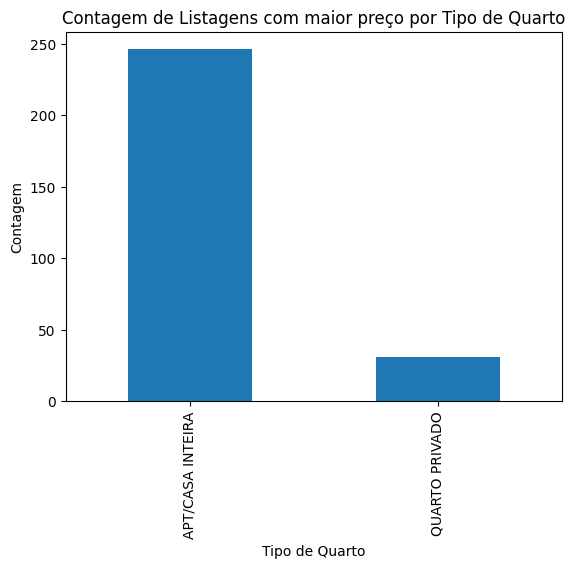

In [ ]:
# Grafico que visualiza qual 'tipo de quarto' esta incluido em listagens com preços altos
df_maior_preco.groupby('tipo_quarto').size().plot.bar()
plt.xlabel('Tipo de Quarto')
plt.ylabel('Contagem')
plt.title('Contagem de Listagens com maior preço por Tipo de Quarto')
plt.show()

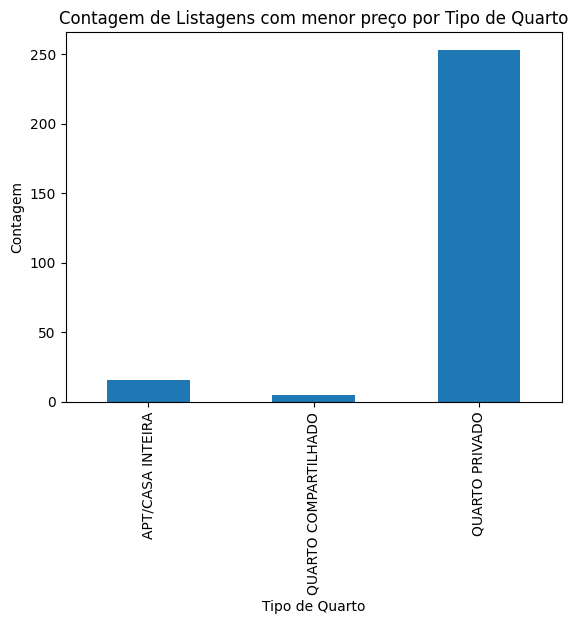

In [ ]:
# Grafico que visualiza qual 'tipo de quarto' esta incluido em listagens com preços baixos
df_menor_preco.groupby('tipo_quarto').size().plot.bar()
plt.xlabel('Tipo de Quarto')
plt.ylabel('Contagem')
plt.title('Contagem de Listagens com menor preço por Tipo de Quarto')
plt.show()

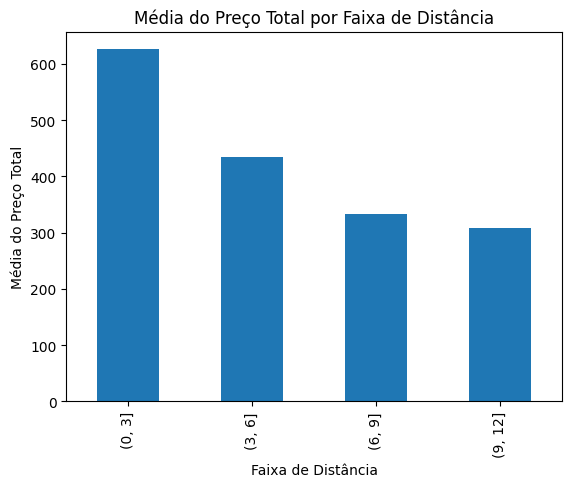

In [ ]:
# Média do preço total por faixa de distância
df_groupby_distancia['preco_total'].plot(kind='bar')
plt.xlabel('Faixa de Distância')
plt.ylabel('Média do Preço Total')
plt.title('Média do Preço Total por Faixa de Distância')
plt.show()

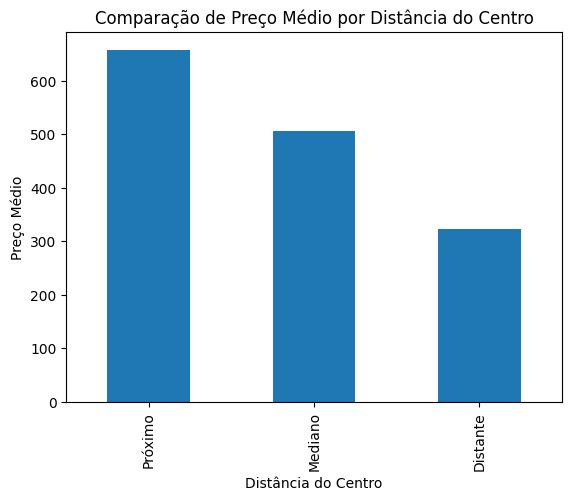

In [ ]:
# Intervalos de distância comparando preço médio
distancia_comparacao = pd.cut(df['distancia_centro'], bins=[0, 2, 5, np.inf], labels=['Próximo', 'Mediano', 'Distante'])
df.groupby(distancia_comparacao)['preco_total'].mean().plot(kind='bar')
plt.xlabel('Distância do Centro')
plt.ylabel('Preço Médio')
plt.title('Comparação de Preço Médio por Distância do Centro')
plt.show()

## Graficos de Setores

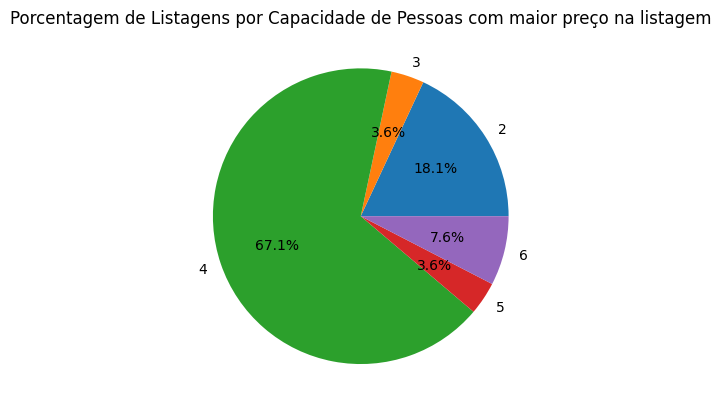

In [ ]:
# Porcentagem de Listagens por Capacidade de Pessoas com maior preço na listagem
df_maior_preco.groupby('capacidade_pessoas').size().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Porcentagem de Listagens por Capacidade de Pessoas com maior preço na listagem')
plt.show()

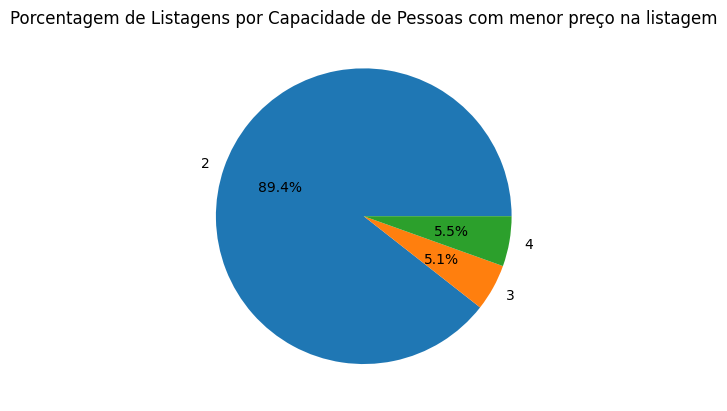

In [ ]:
# Porcentagem de Listagens por Capacidade de Pessoas com menor preço na listagem
df_menor_preco.groupby('capacidade_pessoas').size().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Porcentagem de Listagens por Capacidade de Pessoas com menor preço na listagem')
plt.show()

## Graficos Boxplot

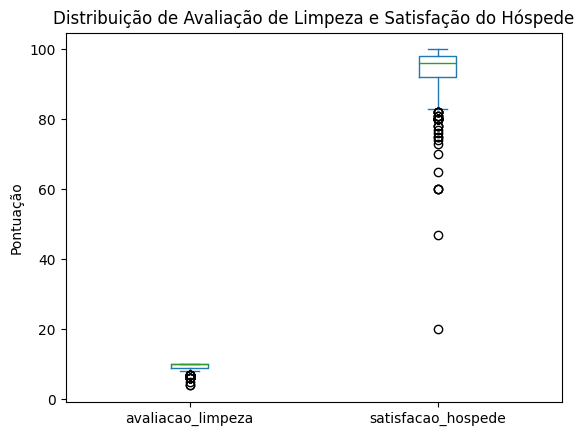

In [ ]:
# Distribuição de Avaliação de Limpeza e Satisfação do Hóspede
df[['avaliacao_limpeza', 'satisfacao_hospede']].plot(kind='box')
plt.ylabel('Pontuação')
plt.title('Distribuição de Avaliação de Limpeza e Satisfação do Hóspede')
plt.show()

### Grafico de linhas

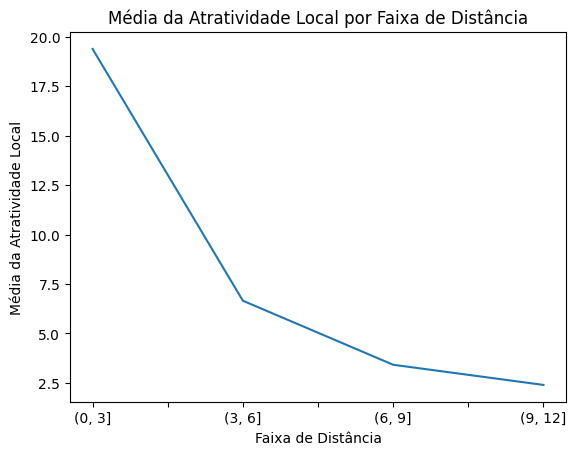

In [ ]:
# Média da Atratividade Local por Faixa de Distância
df_groupby_distancia['atracao_local_normalizado'].plot(kind='line')
plt.xlabel('Faixa de Distância')
plt.ylabel('Média da Atratividade Local')
plt.title('Média da Atratividade Local por Faixa de Distância')
plt.show()

### Grafico de dispersão

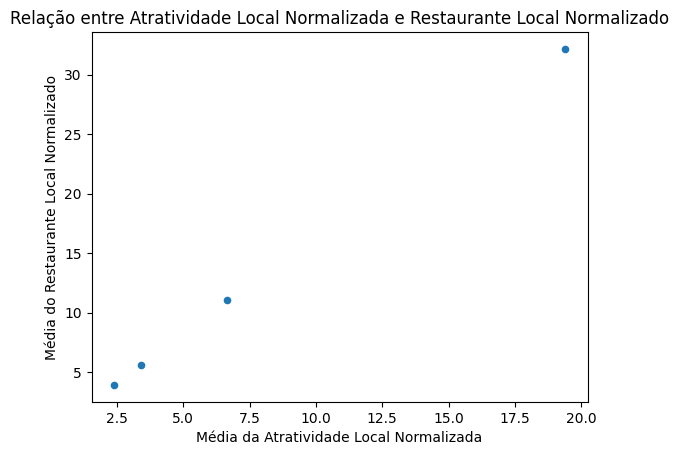

In [ ]:
# Relação entre Atratividade Local e Restaurante Local
df_groupby_distancia.plot(kind='scatter', x='atracao_local_normalizado', y='restaurante_local_normalizado')
plt.xlabel('Média da Atratividade Local Normalizada')
plt.ylabel('Média do Restaurante Local Normalizado')
plt.title('Relação entre Atratividade Local Normalizada e Restaurante Local Normalizado')
plt.show()

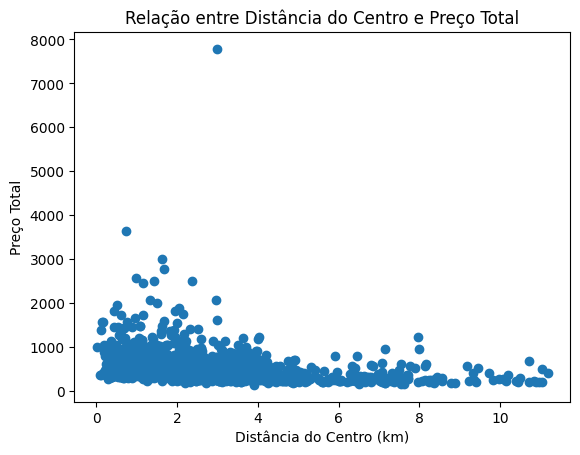

In [ ]:
# Relação entre Distância do Centro e Preço Total
plt.scatter(df['distancia_centro'], df['preco_total'])
plt.xlabel('Distância do Centro (km)')
plt.ylabel('Preço Total')
plt.title('Relação entre Distância do Centro e Preço Total')
plt.show()

### Grafico Histograma

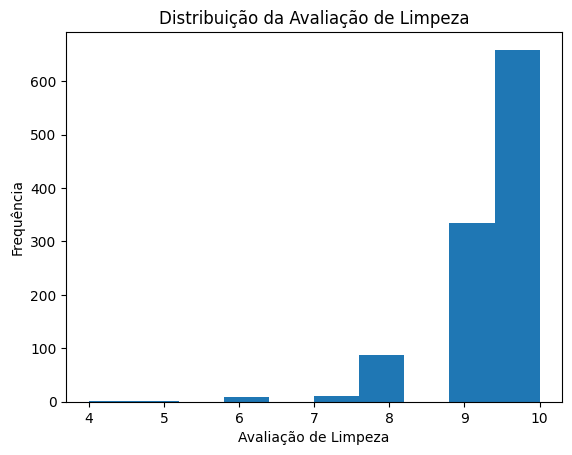

In [ ]:
# Distribuição da Avaliação de Limpeza
df['avaliacao_limpeza'].plot(kind='hist', bins=10)
plt.xlabel('Avaliação de Limpeza')
plt.ylabel('Frequência')
plt.title('Distribuição da Avaliação de Limpeza')
plt.show()

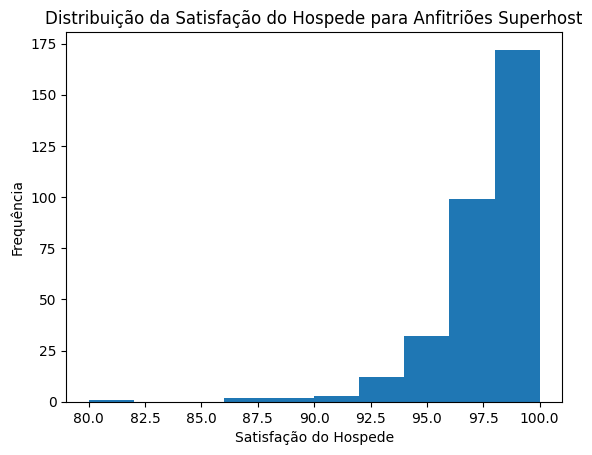

In [ ]:
# Filtrar por anfitrião superhost e comparar satisfação do hospede
df[df['anfitriao_superhost'] == 1]['satisfacao_hospede'].plot(kind='hist', bins=10)
plt.xlabel('Satisfação do Hospede')
plt.ylabel('Frequência')
plt.title('Distribuição da Satisfação do Hospede para Anfitriões Superhost')
plt.show()

## Grafico de correlação

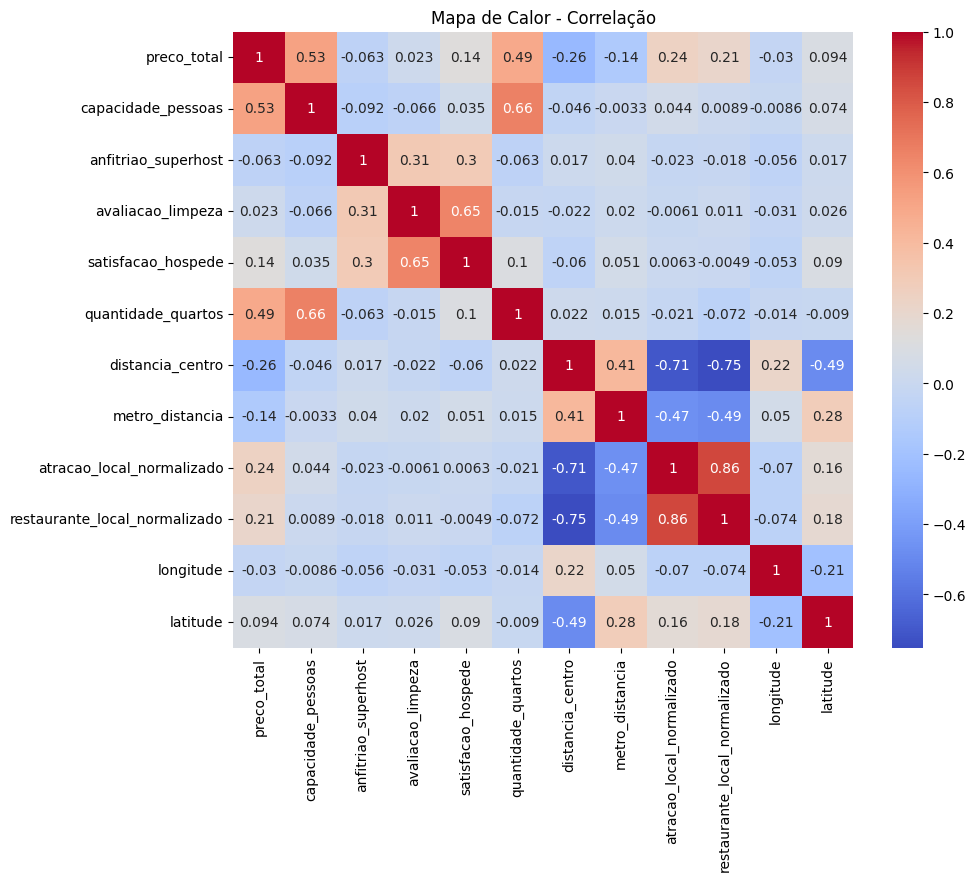

In [ ]:
# Calculando a matriz de correlação
correlacao = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor - Correlação')
plt.show()

# **Conclusão**

* Preço: Oportunidade de explorar preços competitivos para acomodações com capacidade superior a 2 pessoas, considerando que a maioria das listagens é para 2 pessoas.

* Atrações locais: Destacar a proximidade das atrações locais nos anúncios como um diferencial.

* Restaurantes locais: Enfatizar a conveniência dos restaurantes próximos às acomodações.

* Tipo de quarto: Considerar as preferências dos hóspedes ao oferecer diferentes tipos de quartos.

* Limpeza: Destacar a qualidade da limpeza nas descrições dos anúncios para aumentar a confiança dos hóspedes.

* Satisfação dos hospedes: Buscar manter altos níveis de satisfação dos hóspedes através de um bom atendimento e serviços.

* Capacidade de pessoas: Oferecer acomodações para grupos maiores com preços competitivos.

* Distância do centro: Oportunidade de oferecer preços mais baixos para acomodações localizadas em áreas mais afastadas, porém com fácil acesso ao centro da cidade.